# Chapter 16: Matplotlib

**Matplotlib** is a powerful toolbox for 2D plotting and to some extent 3D plotting, see: [https://matplotlib.org/](https://matplotlib.org/).  This chapter shows a couple examples of how to create figures with subplots as well as how to plot points on images.

For installation, see [Chapter 13](Chapter_13_Numpy.ipynb).

## Plotting 2D Points
It is straightforward to create figures with multiple subplots and plot points in each.  Let's create some points in a circle to use for plotting:

In [26]:
import numpy as np
r = 5
theta = np.linspace(0,2*np.pi,25)
x = r*np.cos(theta)
y = r*np.sin(theta)

Now create a figure with 2 subplots

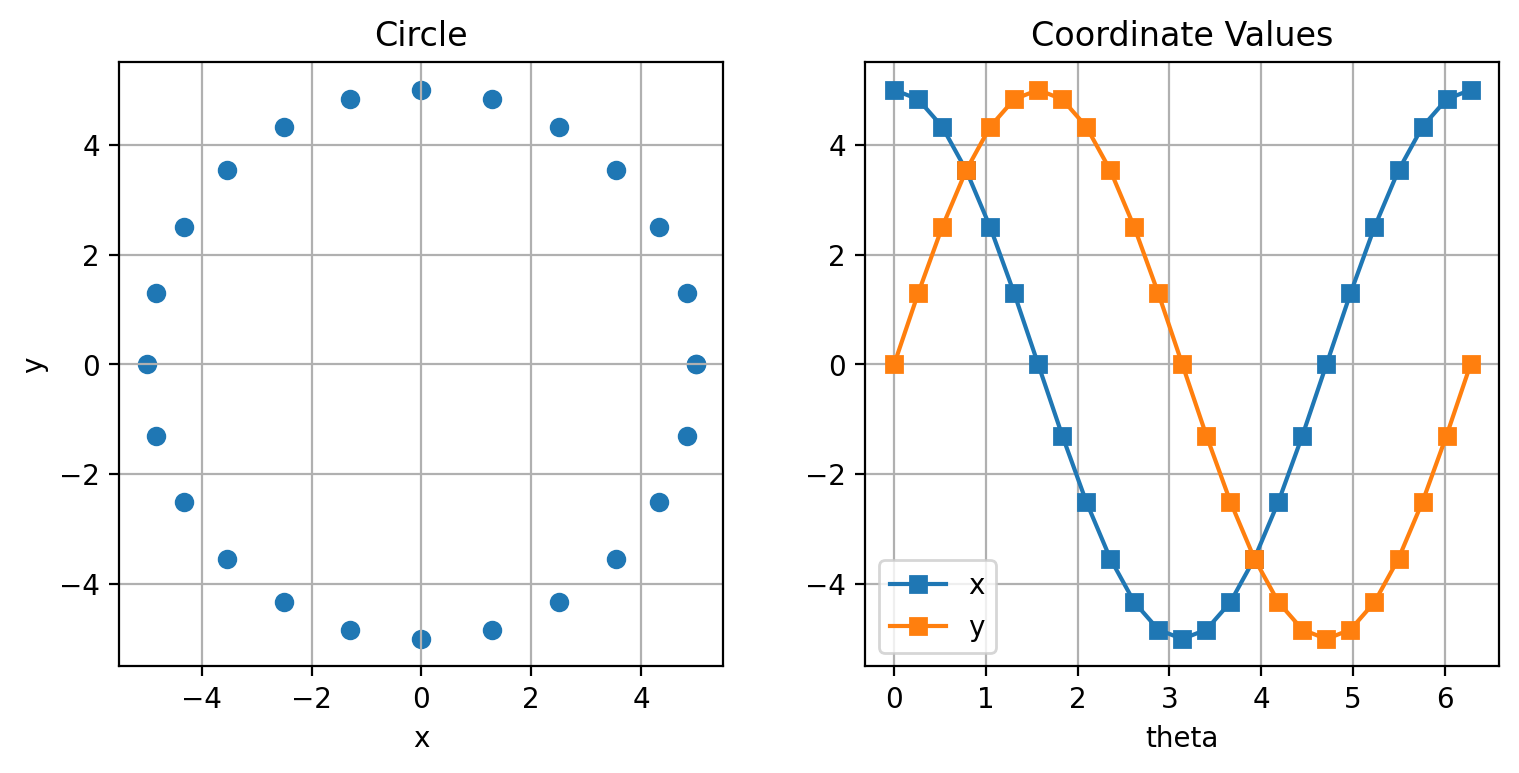

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,4),dpi=200)
ax0 = fig.add_subplot(1,2,1)    # Grid of 1 x 2 subplots, and create subplot 1
plt.scatter(x,y,marker='o')
ax0.set_aspect('equal','box')   # Equal aspect ratio with boundary
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('Circle')
plt.grid()
ax1 = fig.add_subplot(1,2,2)    # Grid of 1 x 2 subplots, and create subplot 2
plt.plot(theta,x,'-',marker='s',label='x')
plt.plot(theta,y,'-',marker='s',label='y')
ax1.set_xlabel('theta')
ax1.set_title('Coordinate Values')
plt.legend()
plt.grid()
plt.show()

The figure can be saved as a png with a transparent background using a command like the below.  

In [21]:
fig.savefig('Output/circle_plots.png', transparent=True)

After you run this have a look for this saved image in the `Output` folder.

## Read in an Image
We can use OpenCV to read in images as in [Chapter 15](Chapter_15_OpenCV.ipynb): 

In [1]:
import cv2 as cv
img = cv.imread('.Images/book.png', -1)

This image will be in BGR (blue-green-red) format, whereas Matplotlib assumes RGB (red-green-blue) format.  We can change it as follows:

In [2]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

## Plotting with Matplotlib
Matplotlib can plot points in a separate layer on top of an image without modifying the image like so:

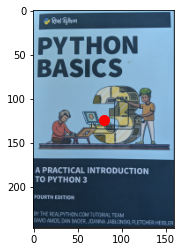

In [3]:
img_cen_xy = (img_rgb.shape[1]/2, img_rgb.shape[0]/2)
fig = plt.figure(num='Matplotlib imshow')
plt.imshow(img_rgb)
plt.plot(img_cen_xy[0], img_cen_xy[1], color='red', marker='o', linewidth=2,markersize=10)
plt.show()

Now let's make a plot of the gradient as calculated in Chapter 15.  First re-calculate the x image gradient:

In [4]:
import numpy as np
imgf_gray = cv.cvtColor((img/255).astype(np.float32), cv.COLOR_BGR2GRAY) # Requires 32-bit float image
imgf_grad_x = cv.Sobel(imgf_gray, cv.CV_32F, 1, 0, ksize=5)

Now plot the gradient along with a colorbar showing the gradient magnitude and sign:

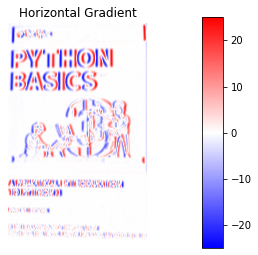

In [28]:
fig = plt.figure(num='Image Gradient')       # Create a figure names "Image Gradient"
ax = fig.add_subplot(1,1,1)                  # Single subplot
pcm = ax.imshow(imgf_grad_x, cmap='bwr', vmax=25, vmin=-25 )     # Show gradient with a blue-white-red colormap
ax.axis('off')
plt.title('Horizontal Gradient')
cbax = fig.add_axes([0.8, 0.1, 0.05, 0.8])   # Add an axes at location (0.8, 0.1) for our colorbar
plt.colorbar(pcm, cax=cbax)                  
plt.show()                                   # Render the plot

___
### [Outline](README.md), Next: [Chapter 17: Linear Equations](Chapter_17_Linear_Equations.ipynb)